In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [3]:
try:
    mnist = pd.read_pickle('fetch_openml.pkcache')
except:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
finally:
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
mnist['data'][0].shape[0]**(1/2)

28.0

In [6]:
X = datasets.load_digits()['data']

In [7]:
y = datasets.load_digits()['target']

In [8]:
import matplotlib.pyplot as plt

In [9]:
mnist['target'][-15:]

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6], dtype=int8)

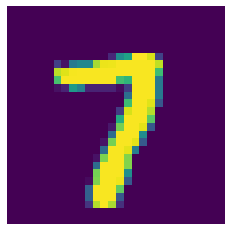

In [10]:
plt.imshow(mnist['data'][-10].reshape(28,28))
plt.axis('off')
plt.show()

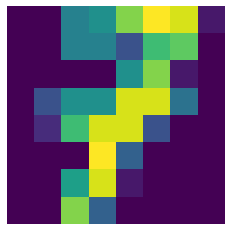

In [11]:
plt.imshow(X[7].reshape(8,8))
plt.axis('off')
plt.show()

In [12]:
X.shape

(1797, 64)

In [13]:
X.shape[0] * 6/7

1540.2857142857142

(array([119., 121., 117., 121., 120., 123., 120., 118., 119., 122.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

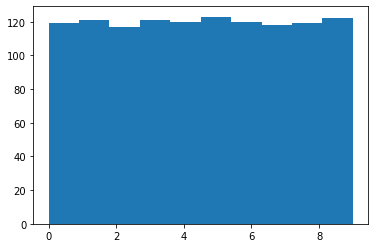

In [14]:
plt.hist(y[:1200])

(array([59., 61., 60., 62., 61., 59., 61., 61., 55., 58.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

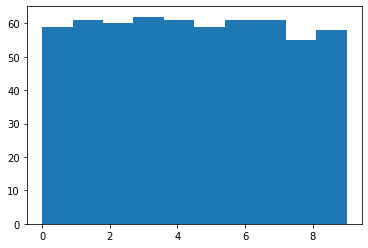

In [15]:
plt.hist(y[1200:])

In [16]:
nova_ordem = np.random.permutation(X.shape[0])

In [17]:
X[nova_ordem]

array([[ 0.,  4., 16., ..., 16.,  8.,  0.],
       [ 0.,  0.,  8., ...,  4.,  0.,  0.],
       [ 0.,  0.,  8., ..., 16., 12.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 14., ...,  5.,  0.,  0.],
       [ 0.,  0.,  1., ...,  9.,  0.,  0.]])

In [18]:
y[nova_ordem]

array([2, 5, 9, ..., 4, 5, 6])

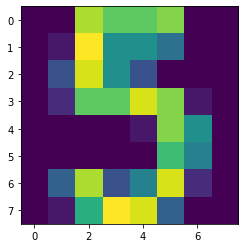

In [19]:
plt.imshow(X[nova_ordem][-2].reshape(8,8))

In [20]:
n_test = int(X.shape[0] * .15)
n_train = X.shape[0] - n_test

In [21]:
n_test

269

In [22]:
n_train

1528

In [23]:
X.shape[0]

1797

In [24]:
X_train, X_test, y_train, y_test = X[:n_train], X[n_train:], y[:n_train], y[n_train:]

In [25]:
X_train.shape

(1528, 64)

In [26]:
y_test.shape

(269,)

In [27]:
# Criar um classificador binario
y == 5

array([False, False, False, ..., False, False, False])

In [28]:
y_train, y_test =  y_train == 5, y_test == 5

In [29]:
from sklearn.linear_model import SGDClassifier

In [30]:
# primeiro treino
sgd_clf = SGDClassifier(random_state=42)

In [31]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [32]:
sgd_clf.predict(X_train[0].reshape(1, -1))

array([False])

In [33]:
y_train[0]

False

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.98039216, 0.98035363, 0.98428291])

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

In [37]:
class Never5Classifier(BaseEstimator, ):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [38]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.89803922, 0.89980354, 0.89980354])

In [39]:
from sklearn.model_selection import cross_val_predict

In [40]:
cross_val_predict(never_5_clf, X_train, y_train, cv=3)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_train, cross_val_predict(sgd_clf, X_train, y_train, cv=3))

array([[1360,   14],
       [  14,  140]])

In [43]:
y_train.shape[0] - y_train.sum()

1374

In [44]:
y_train.sum()

154

In [45]:
confusion_matrix(y_train, cross_val_predict(never_5_clf, X_train, y_train, cv=3))

array([[1374,    0],
       [ 154,    0]])

In [46]:
from sklearn.metrics import plot_confusion_matrix

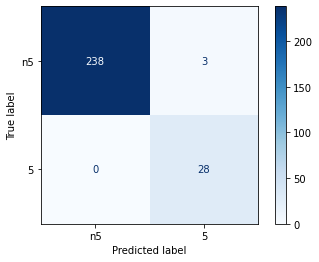

In [47]:
plot_confusion_matrix(sgd_clf, X_test, y_test,
                      display_labels=['n5', '5'],
                      cmap=plt.cm.Blues)

In [48]:
# linha real
# coluna prevista
# imblearn
# classification report

In [49]:
# Desafio: Criar um algo que traga os falsos positivos

In [50]:
cross_val_predict(sgd_clf, X_test, y_test) ^ y_test 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [51]:
diferentes = np.where( cross_val_predict(sgd_clf, X_test, y_test) ^ y_test  == True)

In [52]:
confusion_matrix(cross_val_predict(sgd_clf, X_test, y_test), y_test)

array([[240,   2],
       [  1,  26]])

In [53]:
falso_negativo = []
falso_positivo = []
real = y_test
predito = cross_val_predict(sgd_clf, X_test, y_test)

In [54]:
for i in range(len(y_test)):
    if (real[i] == True) and (predito[i] == False):
        falso_negativo.append(i)
    elif (predito[i] == True) and (real[i] == False):
        falso_positivo.append(i)

In [55]:
falso_negativo

[47, 48]

In [56]:
falso_positivo

[79]

In [57]:
def falsos_positivos_e_negativos(y_real, y_predito):
    
    # verificar que o y_real e o y_predito tem o mesmo tamanho
    # verificar que os valores dentro da array sao booleanos
    # 
    
    falso_negativo = []
    falso_positivo = []
    for i in range(len(y_real)):
        if (y_real[i] == True) and (y_predito[i] == False):
            falso_negativo.append(i)
        elif (y_predito[i] == True) and (y_real[i] == False):
            falso_positivo.append(i)
            
    return {'FN': falso_negativo, 'FP': falso_positivo}

In [58]:
%%timeit
falsos_positivos_e_negativos(y_test, cross_val_predict(sgd_clf, X_test, y_test))

12.7 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [59]:
np.where(~y_test & cross_val_predict(sgd_clf, X_test, y_test) == True)[0]

array([79])

In [60]:
np.where(y_test & ~cross_val_predict(sgd_clf, X_test, y_test) == True)[0]

array([47, 48])

In [61]:
def falsos_positivos_e_negativos(y_real, y_predito):
    return {'FN': np.where((y_real & ~y_predito) == True)[0], 'FP': np.where((~y_real & y_predito) == True)[0]}

In [62]:
%%timeit
falsos_positivos_e_negativos(y_test, cross_val_predict(sgd_clf, X_test, y_test))

11.9 ms ± 293 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


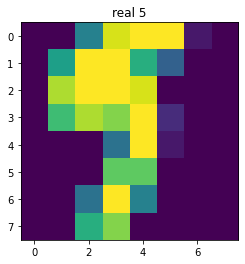

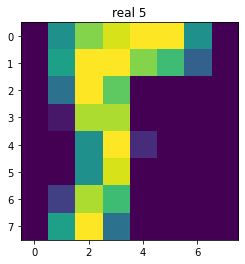

In [63]:
for i in falso_negativo: 
    plt.title(f'real {y[n_train:][i]}')
    plt.imshow(X_test[i].reshape(8,8))
    plt.show()

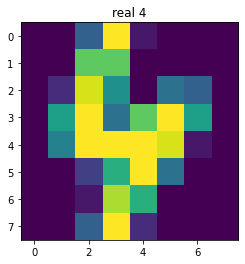

In [64]:
for i in falso_positivo: 
    plt.title(f'real {y[n_train:][i]}')
    plt.imshow(X_test[i].reshape(8,8))
    plt.show()

# Precisão: acurácia das previsoes positivas

precisao = verdadeiro positivo / (verdadeiro positivo + falso positivo)

# Exemplo video

In [65]:
afeta = 0.001
precisao_teste = 0.99 

In [66]:
## teorema de bayes
pessoas = 1000
verdadeiro_positivo = pessoas * afeta
falsos_positivos = pessoas - (pessoas * precisao_teste)
falsos_positivos
conjunto_de_testes = verdadeiro_positivo + falsos_positivos
verdadeiro_positivo / conjunto_de_testes

0.09090909090909091

## Covid

In [67]:
precisao_teste = 0.99 
chance_de_covid = 0.10


In [68]:
pessoas = 1000
verdadeiro_positivo = 10
falsos_positivos = pessoas - (pessoas * precisao_teste)
falsos_positivos
conjunto_de_testes = verdadeiro_positivo + falsos_positivos
verdadeiro_positivo / conjunto_de_testes

0.5

In [69]:
precisao_algo = 0.60
pcte_covid_popu = 0.2

In [70]:
# caio
precisao_teste = precisao_algo
pessoas = 1000
proba_covid = pcte_covid_popu
tem_covid = proba_covid * pessoas
verdadeiro_positivo = tem_covid
verdadeiro_positivo
# da galera que sobrou, aplicar precisao do teste
falso_positivo = (pessoas - verdadeiro_positivo) * (1-precisao_teste)
verdadeiro_positivo / (verdadeiro_positivo + falso_positivo)

0.38461538461538464

In [71]:
# formula video
p_teste_positivo_se_tem_doenca = precisao_algo
p_ter_a_doenca = pcte_covid_popu

p_testar_positivo = (p_ter_a_doenca * p_teste_positivo_se_tem_doenca + (1 - p_ter_a_doenca)  * (1 - p_teste_positivo_se_tem_doenca))
(p_teste_positivo_se_tem_doenca * p_ter_a_doenca) / p_testar_positivo

0.2727272727272727

In [72]:
# formula Gustavo
chance_covid_fato = pcte_covid_popu
populacao = 1000
precisao_teste = precisao_algo
populacao_infectada = populacao * chance_covid_fato
populacao_n_infectada = populacao * (1 - chance_covid_fato)
teste_aplicados_em_quem_nao_tem_covid = populacao_n_infectada * (1 - precisao_teste)
teste_aplicados_em_quem_tem_covid = populacao_infectada * (precisao_teste)
populacao_infectada / (teste_aplicados_em_quem_nao_tem_covid + teste_aplicados_em_quem_tem_covid)

0.45454545454545453

In [73]:
pip install pomegranate

     |████████████████████████████████| 4.5 MB 1.8 MB/s eta 0:00:01
  Created wheel for pomegranate: filename=pomegranate-0.13.5-cp38-cp38-linux_x86_64.whl size=23311251 sha256=6caefd9c0aa6a78056faa1bb4d96065ea8904b1a2529a813251cf403be549f35
  Stored in directory: /home/jovyan/.cache/pip/wheels/45/93/59/7ddc188374bb5ab696541f21de6a3b4b57f635212b78bc300c
Successfully built pomegranate
Note: you may need to restart the kernel to use updated packages.


# Bayes Theorem

- P(H) = Probabilidade da hipotese ser verdadeira (antes da evidencia)
- P(E|H) = Probabilidade de ver uma evidencia se a hipotese é verdadeira
- P(E) = Probabilidade de ver uma evidencia
- P(H|E) = Probabilidade de uma hipotese ser verdadeira dado um evidencia


In [74]:
farmers = 10
librarians = 200
p_descricao_farmers = .40
p_descricao_librarians = .10

In [75]:
pop = 1000
covid = 200
p_descricao_pop = .20
p_descricao_teste = .99

In [76]:
(0.99 * .2) + (.99)

1.188

In [77]:
from pomegranate import *

# Revocação: acurácia dos verdadeiros positivos

revocação = verdadeiro positivo / (verdadeiro positivo + falso negativo)

In [78]:
X = mnist['data']
y = mnist['target']

In [79]:
y_5 = y == 5 
y_5

array([ True, False, False, ..., False,  True, False])

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
_,_,y_train_raw,_ = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train )

In [83]:
y_train.shape

(46900,)

In [84]:
y_train_pred.shape

(46900,)

In [85]:
y_train_5 = y_train

In [86]:
y_train_5.shape

(46900,)

In [87]:
from sklearn.metrics import precision_score, recall_score

In [88]:
y_train_pred

array([3, 2, 2, ..., 1, 0, 0], dtype=int8)

In [89]:
precision_score(y_train_5, y_train_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
recall_score(y_train_5, y_train_pred)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# dá peso a valores baixos
# favorece classificadores com precisao e revocacao similares
f1_score(y_train_5, y_train_pred)

In [ ]:
y_train_pred

In [ ]:
dicionario_falsos_p_n = falsos_positivos_e_negativos(y_train_5, y_train_pred)

In [ ]:
len(dicionario_falsos_p_n['FP'])

In [ ]:
len(dicionario_falsos_p_n['FN'])

In [ ]:
confusion_matrix(y_train_5, y_train_pred)


In [ ]:
plt.imshow(X_train[dicionario_falsos_p_n['FP'][3]].reshape(28,-1))

In [ ]:
plt.imshow(X_train[dicionario_falsos_p_n['FN'][7]].reshape(28,-1))

In [ ]:
# primeiro treino
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

In [ ]:
y_scores = sgd_clf.decision_function(X_train[dicionario_falsos_p_n['FP'][3]].reshape(1,-1))
y_scores

In [ ]:
y_pred_sgd = sgd_clf.predict(X_train)
dicionario_falsos_p_n = falsos_positivos_e_negativos(y_train_5, y_pred_sgd)

In [ ]:
confusion_matrix(y_train_5, y_pred_sgd)

In [ ]:
rand = np.random.randint(0, len(dicionario_falsos_p_n['FP']), 1)[0]
rand

In [ ]:
y_scores = sgd_clf.decision_function(X_train[dicionario_falsos_p_n['FP'][rand]].reshape(1,-1))
y_scores

In [ ]:
plt.imshow(X_train[dicionario_falsos_p_n['FP'][rand]].reshape(28,-1))

In [ ]:
# quando o numero for menor que 4k ele nao é 5
sgd_clf.decision_function(X_train[dicionario_falsos_p_n['FP'][3]].reshape(1,-1))[0] < 4000

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Reacall")
    plt.vlines(15000,ymin=0, ymax=1)
    plt.ylim([0,1])

In [ ]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)

In [ ]:
y_predict_precision = y_scores > 15000

In [ ]:
confusion_matrix(y_train_5,  y_predict_precision)

In [ ]:
precision_score(y_train_5, y_predict_precision)

In [ ]:
recall_score(y_train_5, y_predict_precision)

In [ ]:
# especifidade -> taxa de verdadeiros negativos
# sensibilidade -> revocacao vs 1 - especificidade 

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
falso_positivo_ration, verdadeiro_positivo_ration, limite = roc_curve(y_train_5, y_scores)

In [ ]:
falso_positivo_ration

In [ ]:
verdadeiro_positivo_ration

In [ ]:
limite

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
plot_roc_curve(falso_positivo_ration, verdadeiro_positivo_ration)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train_5, y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest, X_train, y_train_5, method='predict_proba')

In [ ]:
y_scores_forest = y_probas_forest[:,1]

In [ ]:
fpr_forest, tpr_forest, thresolds_forest = roc_curve(y_train_5, y_scores_forest)

In [ ]:
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

In [ ]:
y_train_pred_forest = cross_val_predict(forest, X_train, y_train_5)

In [ ]:
precision_score(y_train_5, y_train_pred_forest)

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
y_train_raw

In [ ]:
sgd_clf.fit(X_train, y_train_raw)

In [ ]:
sgd_clf.predict(X_train[0].reshape(1,-1))

In [ ]:
some_digit_scores = sgd_clf.decision_function(X_train[0].reshape(1,-1))

In [ ]:
some_digit_scores

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [ ]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=12))

In [ ]:
ova_clf = OneVsRestClassifier(SGDClassifier(random_state=12))

In [ ]:
ovo = lambda n: (n*(n-1))/2

In [ ]:
ovo(10)

In [ ]:
import time

In [ ]:
start = time.time()
ovo_score = cross_val_score(ovo_clf, X_train, y_train_5, cv=3)
end = time.time()
end - start

In [ ]:
start2 = time.time()
ova_score = cross_val_score(ova_clf, X_train, y_train_5, cv=3)
end2 = time.time()
end2 - start2

In [ ]:
ovo_score

In [ ]:
ova_score

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.viridis)

In [ ]:
row_sums = conf_mx.sum(axis=0, keepdims=True)
row_sums = conf_mx / row_sums
row_sums

In [ ]:
conf_mx.sum(axis=0)

In [ ]:
conf_mx.sum(axis=1)

In [ ]:
plt.matshow(conf_mx / conf_mx.sum(axis=1))

In [ ]:
d_zero = (conf_mx / conf_mx.sum(axis=0))
np.fill_diagonal(d_zero, 0)

In [ ]:
plt.matshow(d_zero)

In [ ]:
d_zero = (conf_mx / conf_mx.sum(axis=1))
np.fill_diagonal(d_zero, 0)
plt.matshow(d_zero)

In [ ]:
conf_mx

In [ ]:
y_total = pd.Series(y_train).value_counts().sort_index().values

In [ ]:
mx_mat5 = np.round(conf_mx / y_total, 2)

In [ ]:
mx_mat5

In [ ]:
np.fill_diagonal(mx_mat5, 0)

In [ ]:
(mx_mat5*100).sum(axis=1)

In [ ]:
plt.matshow(mx_mat5)

In [ ]:
mx_mat5.argmax(axis=1)

In [ ]:
mx_mat5.max(axis=0)

In [ ]:
mx_mat5

In [ ]:
cl_a, cl_b = 4, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
import matplotlib as mpl

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)